In [3]:
#Task 1 

import numpy as np

class Quadrature:
    def __init__(self, func, a, b, n):
        self.func = func  #function to integrate
        self.a = a        #lower bound
        self.b = b        #upper bound
        self.n = n        
    
    def midpoint_rule(self):
        h = (self.b - self.a) / self.n
        result = 0
        for i in range(self.n):
            x_mid = self.a + (i + 0.5) * h
            result += self.func(x_mid)
        return h * result
    
    def trapezoidal_rule(self):
        h = (self.b - self.a) / self.n
        result = 0.5 * (self.func(self.a) + self.func(self.b))
        for i in range(1, self.n):
            x = self.a + i * h
            result += self.func(x)
        return h * result
    
    def simpsons_rule(self):
        if self.n % 2 == 1:
            self.n += 1  #n is even for Simpson's rule
        h = (self.b - self.a) / self.n
        result = self.func(self.a) + self.func(self.b)
        for i in range(1, self.n, 2):
            result += 4 * self.func(self.a + i * h)
        for i in range(2, self.n-1, 2):
            result += 2 * self.func(self.a + i * h)
        return (h / 3) * result


def f(x):
    return np.sin(x)

quad = Quadrature(f, 0, np.pi, 100)
print("Midpoint Rule:", quad.midpoint_rule())
print("Trapezoidal Rule:", quad.trapezoidal_rule())
print("Simpson's Rule:", quad.simpsons_rule())


Midpoint Rule: 2.0000822490709864
Trapezoidal Rule: 1.9998355038874436
Simpson's Rule: 2.0000000108245044


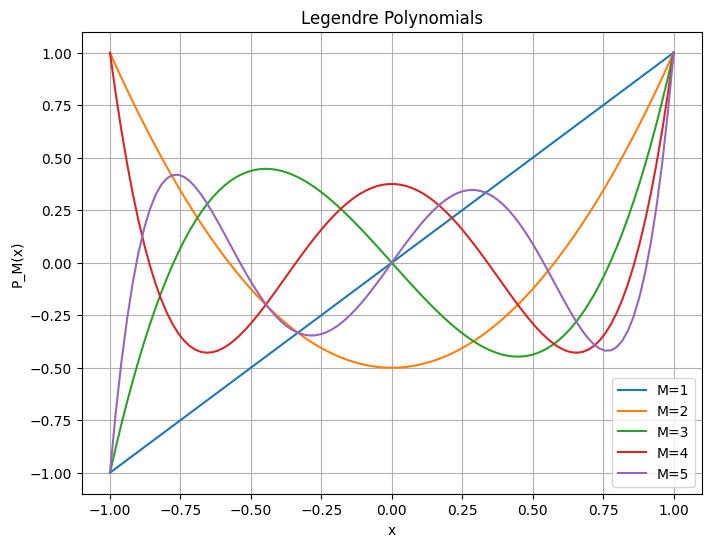

Midpoint Rule: 2.0000822490709864
Trapezoidal Rule: 1.9998355038874436
Simpson's Rule: 2.0000000108245044


In [2]:
import matplotlib.pyplot as plt
import scipy.special as sp
import numpy as np
class Quadrature:
    def __init__(self, func, a, b, n):
        self.func = func  
        self.a = a        
        self.b = b        
        self.n = n        
    
    def midpoint_rule(self):
        h = (self.b - self.a) / self.n
        result = 0
        for i in range(self.n):
            x_mid = self.a + (i + 0.5) * h
            result += self.func(x_mid)
        return h * result
    
    def trapezoidal_rule(self):
        h = (self.b - self.a) / self.n
        result = 0.5 * (self.func(self.a) + self.func(self.b))
        for i in range(1, self.n):
            x = self.a + i * h
            result += self.func(x)
        return h * result
    
    def simpsons_rule(self):
        if self.n % 2 == 1:
            self.n += 1  
        h = (self.b - self.a) / self.n
        result = self.func(self.a) + self.func(self.b)
        for i in range(1, self.n, 2):
            result += 4 * self.func(self.a + i * h)
        for i in range(2, self.n-1, 2):
            result += 2 * self.func(self.a + i * h)
        return (h / 3) * result

class GaussQuad(Quadrature):
    def __init__(self, func, a, b, n, order):
        super().__init__(func, a, b, n)
        self.order = order
    
    def legendre_polynomial(self, M):
        return sp.legendre(M)


x = np.linspace(-1, 1, 100)
M_values = [1, 2, 3, 4, 5]
plt.figure(figsize=(8, 6))

for M in M_values:
    P_M = sp.legendre(M)
    plt.plot(x, P_M(x), label=f'M={M}')

plt.xlabel('x')
plt.ylabel('P_M(x)')
plt.title('Legendre Polynomials')
plt.legend()
plt.grid()
plt.savefig('legendre_polynomials.png')
plt.show()


def f(x):
    return np.sin(x)

quad = Quadrature(f, 0, np.pi, 100)
print("Midpoint Rule:", quad.midpoint_rule())
print("Trapezoidal Rule:", quad.trapezoidal_rule())
print("Simpson's Rule:", quad.simpsons_rule())


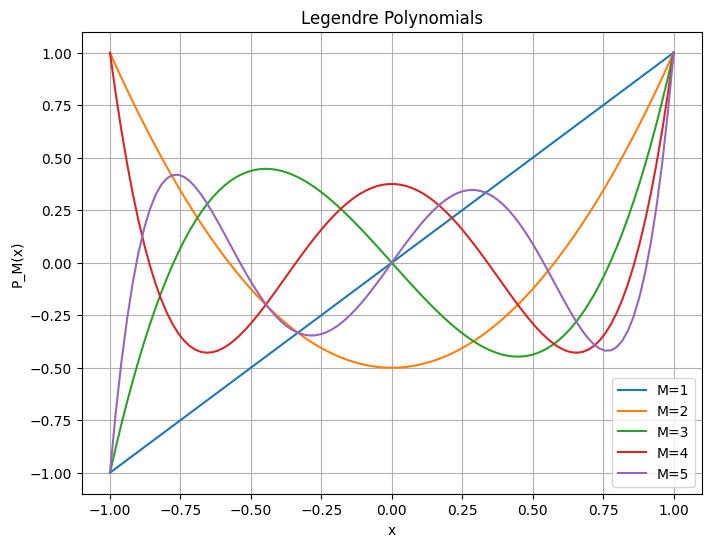

Midpoint Rule: -4.2203208825904447e-16
Trapezoidal Rule: -1.3951473992034527e-16
Simpson's Rule: -1.3253900292432802e-16


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

class Quadrature:
    def __init__(self, func, a, b, n):
        self.func = func  
        self.a = a        
        self.b = b        
        self.n = n        
    
    def midpoint_rule(self):
        h = (self.b - self.a) / self.n
        result = 0
        for i in range(self.n):
            x_mid = self.a + (i + 0.5) * h
            result += self.func(x_mid)
        return h * result
    
    def trapezoidal_rule(self):
        h = (self.b - self.a) / self.n
        result = 0.5 * (self.func(self.a) + self.func(self.b))
        for i in range(1, self.n):
            x = self.a + i * h
            result += self.func(x)
        return h * result
    
    def simpsons_rule(self):
        if self.n % 2 == 1:
            self.n += 1  
        h = (self.b - self.a) / self.n
        result = self.func(self.a) + self.func(self.b)
        for i in range(1, self.n, 2):
            result += 4 * self.func(self.a + i * h)
        for i in range(2, self.n-1, 2):
            result += 2 * self.func(self.a + i * h)
        return (h / 3) * result

class GaussQuad(Quadrature):
    def __init__(self, func, a, b, n, order):
        super().__init__(func, a, b, n)
        self.order = order
    
    def legendre_polynomial(self, M):
        return sp.legendre(M)
    
    def gaussian_quadrature(self, M):
        roots, weights = np.polynomial.legendre.leggauss(M)
        roots_transformed = 0.5 * (self.b - self.a) * roots + 0.5 * (self.b + self.a)
        weights_transformed = 0.5 * (self.b - self.a) * weights
        return roots_transformed, weights_transformed


x = np.linspace(-1, 1, 100)
M_values = [1, 2, 3, 4, 5]
plt.figure(figsize=(8, 6))

for M in M_values:
    P_M = sp.legendre(M)
    plt.plot(x, P_M(x), label=f'M={M}')

plt.xlabel('x')
plt.ylabel('P_M(x)')
plt.title('Legendre Polynomials')
plt.legend()
plt.grid()
plt.savefig('legendre_polynomials.png')
plt.show()

#compute roots and weights for M=[1,2,3,4,5] and save to file
a, b = -1, 1 
with open("gaussian_quadrature_results.txt", "w") as f:
    for M in M_values:
        gauss_quad = GaussQuad(lambda x: x, a, b, 100, M)
        roots, weights = gauss_quad.gaussian_quadrature(M)
        f.write(f"M={M}\n")
        f.write("Roots: " + ", ".join(map(str, roots)) + "\n")
        f.write("Weights: " + ", ".join(map(str, weights)) + "\n\n")


def f(x):
    return np.cos(x)

quad = Quadrature(f, 0, np.pi, 100)
print("Midpoint Rule:", quad.midpoint_rule())
print("Trapezoidal Rule:", quad.trapezoidal_rule())
print("Simpson's Rule:", quad.simpsons_rule())


In [ ]:
#Task 3 

